In [32]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime

#For Map
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker 
from matplotlib.patches import Rectangle

#Stuff for Meteorological calculations 
import wrf
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units
from wrf import (to_np, interplevel, geo_bounds, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

#Next thing: we need to know open up every file in the Dean Directory and loop through them!
import glob
import pandas as pd

import matplotlib.patches as mpatches

In [2]:
path = '/Users/cjmasiel/Desktop/Larson_Class/Hw_1/prate.sfc.mon.mean.194801-202012.nc'

In [3]:
#open our netCDF file using xarray
dataset = xr.open_dataset(path)    
dataset

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 876)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [4]:
#now that we have this funcition, let us create a function so that we can input lat and lon values 
#and create a nice looking plot!

def plot_location(x,y,location): #x here is longitude, y here is latitude
    
    #first, lets open up the dataset
    dataset = xr.open_dataset(path) 
    
    #read in pertinent variables:
    p = dataset['prate']
    lat = dataset['lat']
    lon = dataset['lon']
    
    #specify what latitude you are interested in looking at
    lat_of_location = y 
    lon_of_location = x
    
    if lon_of_location < 0:
        lon_of_interest =  360 + lon_of_location #get that lon in terms of degrees east
    else:
        lon_of_interest = x
    
    # Find the index where the latitude value is closest to 15
    index_lat = np.abs(lat - lat_of_location).argmin()
    index_lon = np.abs(lon - lon_of_interest).argmin()

    #now, lets find the precipitation value for the given location
    p_location = p[:,index_lat,index_lon] * 84600.0 #units in mm/day
    
    # Spacing for each month (1/12th of a year)
    spacing = 1 / 12

    # Generating the time axis from 1948 to just before 2021 with monthly spacing
    time_axis = np.arange(1948, 2021, spacing)

    #now that we have all the pertinent information for plotting, create a time series of precipitation for 
    #the inputted location
    plt.plot(time_axis, p_location, color = 'black', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('mm/day')
    plt.grid()

    #set limits for our plot
    plt.xlim(1948, 2021)                                #sets x-axis limits
    plt.ylim(min(p_location)-1, max(p_location)+1)      #sets y-axis limits

    if lat_of_location > 0:
        plt.title(f'NCEP Precipitation rate for ~{lon_of_interest}°E, {y}°N, \nlocation = {location}')
    else:
        plt.title(f'NCEP Precipitation rate for ~{lon_of_interest}°E, {-y}°S, \nlocation = {location}')
        
    plt.show()

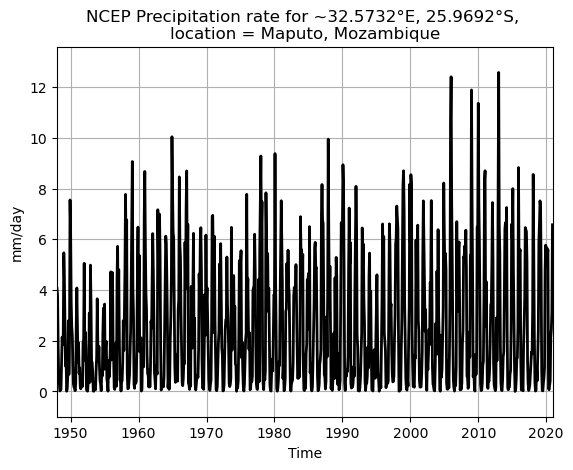

In [5]:
#Mozabique Precipitation
plot_location(32.5732,-25.9692,'Maputo, Mozambique')

32.5732
-25.9692
[5.5811987, 5.3313503, 4.3311076, 2.269173, 0.5964998, 0.17620616, 0.2279231, 0.48139635, 1.1607441, 1.7098539, 3.534289, 5.3440547]


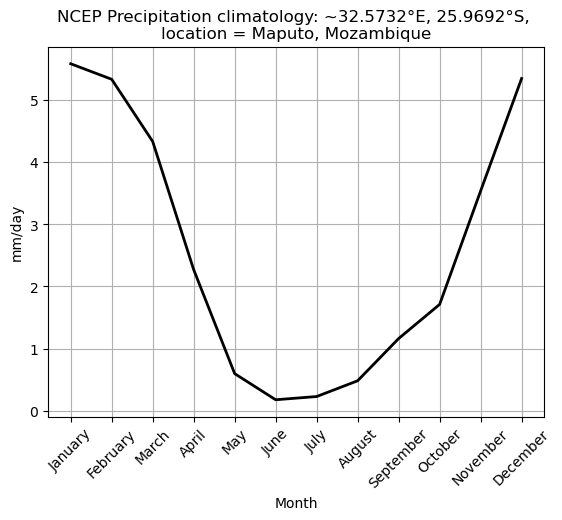

In [20]:
#Create climatology per month for each city:
#first, lets open up the dataset
dataset = xr.open_dataset(path) 

#read in pertinent variables:
p   = dataset['prate']
lat = dataset['lat']
lon = dataset['lon']

#specify what latitude you are interested in looking at
lat_of_location = -25.9692
lon_of_location = 32.5732

if lon_of_location < 0:
    lon_of_interest =  360 + lon_of_location #get that lon in terms of degrees east
else:
    lon_of_interest = lon_of_location

print(lon_of_interest)
print(lat_of_location)

# Find the index where the latitude value is closest to 15
index_lat = np.abs(lat - lat_of_location).argmin()
index_lon = np.abs(lon - lon_of_interest).argmin()

#now, lets find the precipitation value for the given location
p_location = p[:,index_lat,index_lon] * 84600.0 #units in mm/day
#print(p_location)

# Spacing for each month (1/12th of a year)
spacing = 1 / 12

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

#the format, 
varP_length = len(p_location)                     # Get the length of the DataArray

p_bel_month_cliamtology = []
for k in range(12):
    month_thingy = [i for i in range(k, varP_length, 12)]  # Use varP_length here))
    p_location_month = p_location[month_thingy]
    month_clim = np.mean(p_location_month.values)
    p_bel_month_cliamtology.append(month_clim)

print(p_bel_month_cliamtology)

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

#now that we have all the pertinent information for plotting, create a time series of precipitation for 
#the inputted location
plt.plot(months, p_bel_month_cliamtology, color = 'black', linewidth=2)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('mm/day')

if lat_of_location > 0:
    plt.title(f'NCEP Precipitation climatology: ~{lon_of_interest}°E, {lat_of_location}°N, \nlocation = Maputo, Mozambique')
else:
    plt.title(f'NCEP Precipitation climatology: ~{lon_of_interest}°E, {-lat_of_location}°S, \nlocation = Maputo, Mozambique')

plt.grid()
plt.show()

In [35]:
#this below cell will compute anomalies for years of interest: We will ignore 2019 because that is the 
#year of our configuration. Soooooo

#Create climatology per month for each city:
#first, lets open up the dataset
dataset = xr.open_dataset(path) 

#read in pertinent variables:
p   = dataset['prate']
lat = dataset['lat']
lon = dataset['lon']

In [85]:
#specify what latitude you are interested in looking at
lat_of_location = -25.9692
lon_of_location = 32.5732

#Years of Interest
years = 2020

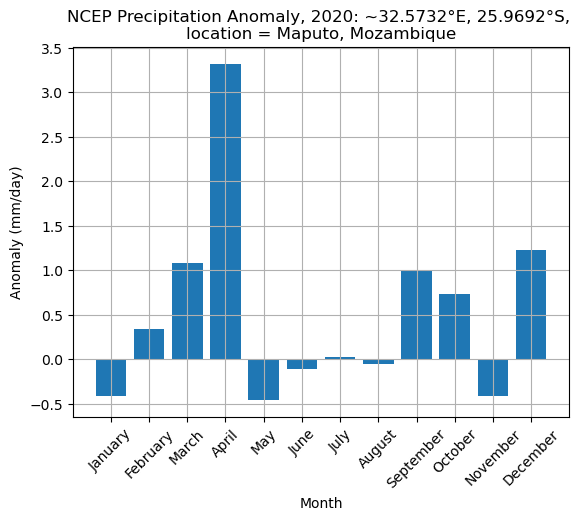

In [86]:
if lon_of_location < 0:
    lon_of_interest =  360 + lon_of_location #get that lon in terms of degrees east
else:
    lon_of_interest = lon_of_location

# Find the index where the latitude value is closest to 15
index_lat = np.abs(lat - lat_of_location).argmin()
index_lon = np.abs(lon - lon_of_interest).argmin()

#now, lets find the precipitation value for the given location
p_location = p[:,index_lat,index_lon] * 84600.0 #units in mm/day
#print(p_location)

# Spacing for each month (1/12th of a year)
spacing = 1 / 12

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

#the format, 
varP_length = len(p_location)                     # Get the length of the DataArray
#print(varP_length)

p_bel_month_cliamtology = []

for k in range(12):
    month_thingy = [i for i in range(k, varP_length, 12)]  # Use varP_length here))
    #print(month_thingy)
    p_location_month = p_location[month_thingy]
    month_clim = np.mean(p_location_month.values)
    p_bel_month_cliamtology.append(month_clim)

#Here, we will add the year of interest precipitation
year = years - 1948
anom_range_floor = year * 12
anom_range_ceiling  = (year +1) * 12
anom_range = np.arange(anom_range_floor, anom_range_ceiling,1)
anom_range_list = anom_range.tolist()

p_analog_month = []

for k in range(12):
    month_thingy_a = anom_range_list[k]  # Use varP_length here))
    p_location_month_a = p_location[month_thingy_a]
    month_clim_a = np.mean(p_location_month_a.values)
    p_analog_month.append(month_clim_a)

#now, compute anonmalies
anomalies = []

for i in range(len(p_analog_month)):
    anom = p_analog_month[i] - p_bel_month_cliamtology[i]
    anomalies.append(anom)


months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

# Create a bar chart for anomalies
plt.bar(months, anomalies)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Month')
plt.ylabel('Anomaly (mm/day)')
plt.title('Monthly Precipitation Anomalies')

if lat_of_location > 0:
    plt.title(f'NCEP Precipitation Anomaly, {years}: ~{lon_of_interest}°E, {lat_of_location}°N, \nlocation = Maputo, Mozambique')
else:
    plt.title(f'NCEP Precipitation Anomaly, {years}: ~{lon_of_interest}°E, {-lat_of_location}°S, \nlocation = Maputo, Mozambique')

plt.grid()
plt.show()

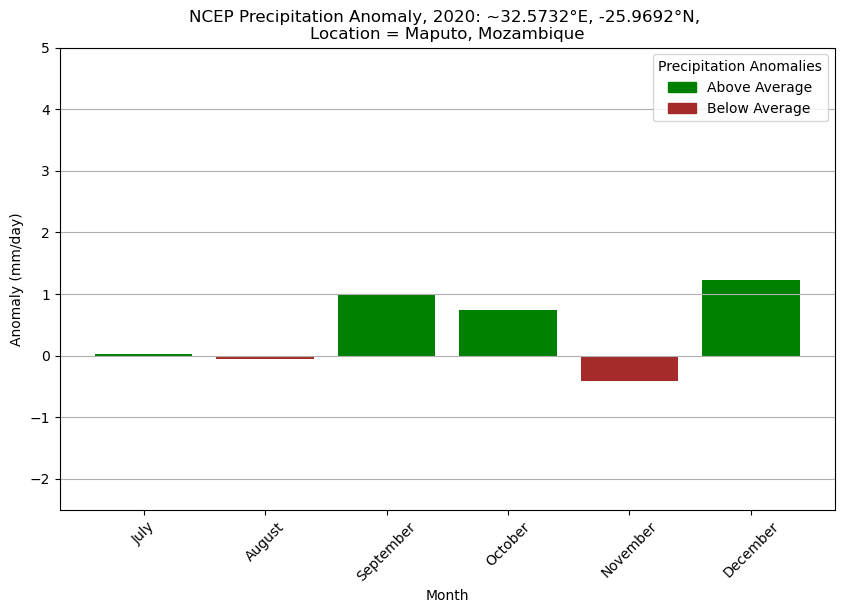

In [87]:
#Simplify longitude handling
lon_of_interest = 360 + lon_of_location if lon_of_location < 0 else lon_of_location

# Find the closest index for latitude and longitude
index_lat = np.abs(lat - lat_of_location).argmin()
index_lon = np.abs(lon - lon_of_interest).argmin()

# Calculate precipitation value for the given location in mm/day
p_location = p[:, index_lat, index_lon] * 84600.0

# Time axis and calculation of monthly climatology
time_axis = np.arange(1948, 2021, 1/12)
varP_length = len(p_location)

p_bel_month_climatology = [np.mean(p_location[i::12]) for i in range(12)]

# Calculate the year of interest precipitation
year_index = (years - 1948) * 12
p_analog_month = [p_location[year_index + i] for i in range(12)]

# Compute anomalies
anomalies = [p_analog_month[i] - p_bel_month_climatology[i] for i in range(12)]

# Define colors for each bar based on the anomaly value
colors = ['green' if anomaly > 0 else 'brown' for anomaly in anomalies]

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visibility
bars = plt.bar(months[6:], anomalies[6:], color=colors[6:])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Anomaly (mm/day)')
plt.ylim(-2.5, 5)

title_lat = f"{lat_of_location}°N"  # Assuming lat_of_location is defined
plt.title(f'NCEP Precipitation Anomaly, {years}: ~{lon_of_interest}°E, {title_lat}, \nLocation = Maputo, Mozambique')

plt.grid(axis='y')  # Only display horizontal grid lines for better readability

# Create custom legend
below_average_patch = mpatches.Patch(color='brown', label='Below Average')
above_average_patch = mpatches.Patch(color='green', label='Above Average')
plt.legend(handles=[above_average_patch, below_average_patch], title="Precipitation Anomalies")

plt.show()

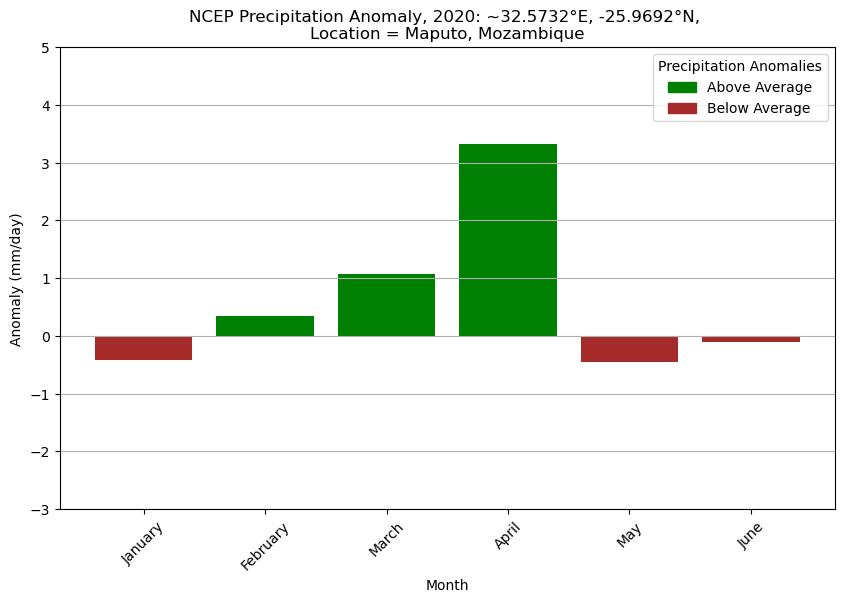

In [88]:
#Simplify longitude handling
lon_of_interest = 360 + lon_of_location if lon_of_location < 0 else lon_of_location

# Find the closest index for latitude and longitude
index_lat = np.abs(lat - lat_of_location).argmin()
index_lon = np.abs(lon - lon_of_interest).argmin()

# Calculate precipitation value for the given location in mm/day
p_location = p[:, index_lat, index_lon] * 84600.0

# Time axis and calculation of monthly climatology
time_axis = np.arange(1948, 2021, 1/12)
varP_length = len(p_location)

p_bel_month_climatology = [np.mean(p_location[i::12]) for i in range(12)]

# Calculate the year of interest precipitation
year_index = (years - 1948) * 12
p_analog_month = [p_location[year_index + i] for i in range(12)]

# Compute anomalies
anomalies = [p_analog_month[i] - p_bel_month_climatology[i] for i in range(12)]

# Define colors for each bar based on the anomaly value
colors = ['green' if anomaly > 0 else 'brown' for anomaly in anomalies]

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visibility
bars = plt.bar(months[:6], anomalies[:6], color=colors[:6])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Anomaly (mm/day)')
plt.ylim(-3, 5)

title_lat = f"{lat_of_location}°N"  # Assuming lat_of_location is defined
plt.title(f'NCEP Precipitation Anomaly, {years}: ~{lon_of_interest}°E, {title_lat}, \nLocation = Maputo, Mozambique')

plt.grid(axis='y')  # Only display horizontal grid lines for better readability

# Create custom legend
below_average_patch = mpatches.Patch(color='brown', label='Below Average')
above_average_patch = mpatches.Patch(color='green', label='Above Average')
plt.legend(handles=[above_average_patch, below_average_patch], title="Precipitation Anomalies")

plt.show()